# Student marks

El dataset que se analizará cuenta con 3 columnas.
* number_courses: Número de cursos en los que el alumno en cuestión está enscrito actualmente. Consta de un número entero.
* time_study: Número de horas en promedio que el alumno dedica durante un día al estudio. Consta de un valor de punto flotante.
* Marks: Calificación obtenida por el alumno. Consta de un valor de punto flotante.

## Préambulo
### Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

### Lectura del archivo csv

In [2]:
df = pd.read_csv('Student_Marks.csv')

### Exploración de datos

In [3]:
df

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


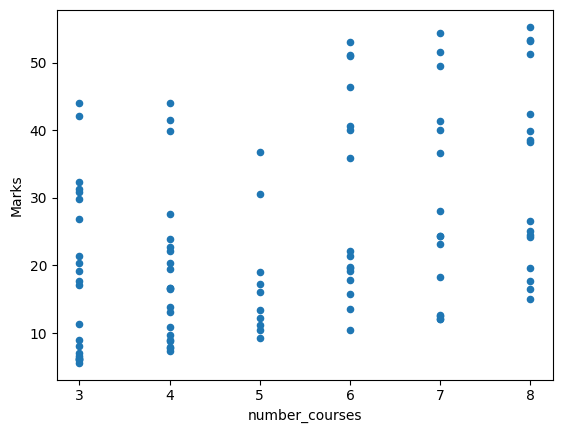

In [4]:
# Graficar el df como scatter plot
df.plot(x='number_courses', y='Marks', kind='scatter')  
plt.show()

En esta gráfica, se muestra el número de cursos contra las calificaciones del alumno. No es posible apreciar una coorrelacón fuerte entre estos datos, además de una leve dentencia hacia una mayor calificación dado un mayor número de cursos, pero no la suficiente como para considerar apropiada la inclusión de esta variable en el análisis.

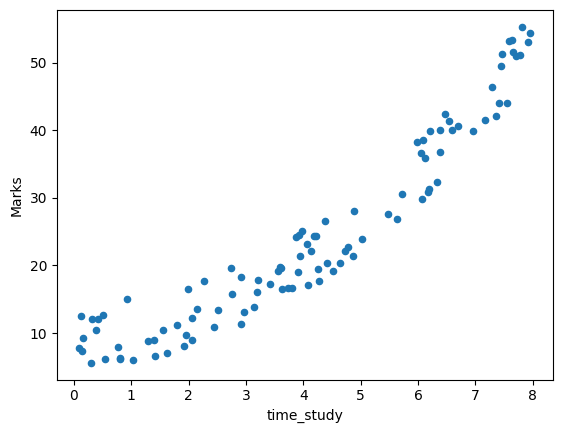

In [5]:
# Graficar el 'time_study' como scatter plot
df.plot(x='time_study', y='Marks', kind='scatter')  
plt.show()

A diferencia de el número de cursos, el tiempo de estudio parece estar fuertemente relacionado con las calificaciones del estudiante. Parece apreciarse una relación lineal, por lo que a continuación se aplicará un algoritmo de regresión lineal con la finalidad de generar un modelo que se ajuste al comportamiento de los datos.

### Partición de los datos

In [6]:
time_study = np.array(df["time_study"])
marks = np.array(df["Marks"])

train_features, test_features, train_targets, test_targets = train_test_split(time_study, marks, test_size = 0.20, random_state = 42)

## Regresión lineal

En esta función se implementa una regersión lineal simple usando descenso de gradiente para encontrar valores optimos para theta ($θ_{0},θ_{1}$). Sigue las formulas descritas a continuación:

$\frac{∂J_{θ}}{∂θ_0} = \frac{1}{n}\sum_{i=1}^{n}(h_θ(x_i)-y_i)$

$\frac{∂J_{θ}}{∂θ_1} = \frac{1}{n}\sum_{i=1}^{n}(h_θ(x_i)-y_i)x_i$

La función recibe 6 parametros:
* x: Variable independiente
* y: Variable dependiente
* h: Función de hipotesis
* iterations: Número de iteraciones
* alpha: Tasa de aprendizaje
* theta: Valores iniciales para $θ_{0}$ y $θ_{1}$

Se regresan los valores optimizados de theta $θ$ como un arreglo de 2 posiciones.

In [7]:
def linear_regression(x, y, h, iterations, alpha, theta):

    # Total de datos
    n = len(x);
    
    for i in range(iterations):
        # Repetir procedimiento de la iteración pasada
        delta = []
        deltaX = []
        for xi, yi in zip(x, y):
            pred = h(xi, theta);
            # Calcular delta para theta1 y para cada muestra
            delta.append(pred - yi)
            deltaX.append((pred - yi) * xi)

        # Calcular sumatorias y promedio
        dJt0 = (1 / n)*sum(delta)
        dJt1 = (1 / n)*sum(deltaX)

        # Actualizar theta0
        theta[0] = theta[0] - alpha*dJt0
        # Actualizar theta1
        theta[1] = theta[1] - alpha*dJt1

    return theta

Se empleará el Error Cuadrático Medio (*MSE* por sus siglas en inglés) como métrica para evaluar el desempeño del modelo, y de este modo comparar los diferentes valores de theta iniciales para elegir el más apropiado.

$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

In [8]:
def mean_squared_error(x, y, h, theta):
    # Error cuadrático acumulado
    cse = 0
    for xi, yi in zip(x, y):
        cse += ( yi - h(xi, theta))**2

    # Error cuadrático medio
    mse = cse / len(x)

    return mse

En el código a continuación se ejectua la función de regresión lineal con todas las posibles combinaciones para $θ_{0}$ y $θ_{1}$ tomando en cuenta los números enteros entre 0 y 10, no se consideraron valores más elevados que esto ya que el tiempo de ejecución incrimenta considerablemente al exceder estos parametros. 

De todas las ejecuciones, se guardan los valores para $θ$ con un menor $\text{MSE}$.

In [9]:
# Función de hipotesis
linear_hipotesis = lambda x, theta: theta[0] + theta[1]*x
# Tasa de aprendizaje (alpha)
_alpha = 0.0001
# Numero de iteraciones
it = 1000

# Valor inicial de theta
linear_optimal_theta = [0, 0]

# Error cuadrático medio inicia como infinito para reducirlo cada vez que se encuentre un modelo más optimo
min_mse = float('inf')

for theta_0 in range(0, 10, 1):
    for theta_1 in range(0, 10, 1):
        _theta = linear_regression(train_features, train_targets, linear_hipotesis, it, _alpha, [theta_0, theta_1])
        mse = mean_squared_error(train_features, train_targets, linear_hipotesis, _theta)
        if mse < min_mse:
            print(_theta, theta_0, theta_1, " -> ", mse)
            min_mse = mse
            linear_optimal_theta = _theta

[0.9838018626731945, 4.96125242884554] 0 0  ->  33.1994207334502
[0.8262419794745492, 5.108847919632667] 0 1  ->  30.30041537136974
[0.6686820962759068, 5.256443410419794] 0 2  ->  27.989141791100984
[0.5111222130772612, 5.4040389012069285] 0 3  ->  26.26559999264385
[0.35356232987862, 5.5516343919940585] 0 4  ->  25.12978997599852
[0.19600244667997366, 5.699229882781198] 0 5  ->  24.581711741164895
[1.2979016733042492, 5.394074508795426] 1 4  ->  24.10458844657258
[1.1403417901056043, 5.541669999582548] 1 5  ->  23.57454933141655
[2.084681133531241, 5.384110116383901] 2 5  ->  23.063899051508496
[3.0290204769568727, 5.22655023318526] 3 5  ->  23.049760901440784


Los valores encontrados son $θ_{0} = 0.963$ y $θ_{1} = 5.764$.

De este modo, nuestra regresión lineal nos arroja un modelo con la siguiente forma:

$h(x) = 0.963 + x 5.764$

Este modelo tiene a su vez un $\text{MSE} = 22.823$

A continuación se grafica este modelo junto con los datos originales.

MSE subconjunto de entrenamiento:  23.049760901440784
MSE subconjunto de prueba:  27.731830931241944


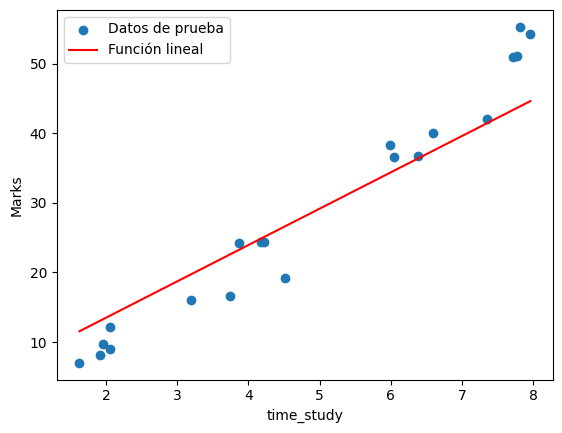

In [10]:
linear_training_mse = mean_squared_error(train_features, train_targets, linear_hipotesis, linear_optimal_theta)
linear_testing_mse = mean_squared_error(test_features, test_targets, linear_hipotesis, linear_optimal_theta)

print("MSE subconjunto de entrenamiento: ", linear_training_mse)
print("MSE subconjunto de prueba: ", linear_testing_mse)

# Se grafican los datos de prueba
plt.scatter(test_features, test_targets, label='Datos de prueba')

# Genera los valores 'x' para la grafica de la predicción
x_values = np.linspace(test_features.min(), test_features.max(), 100)
y_values = linear_hipotesis(x_values, linear_optimal_theta)

# Grafica la prediccoón como una linea
plt.plot(x_values, y_values, color='red', label='Función lineal')

plt.xlabel('time_study')
plt.ylabel('Marks')

plt.legend()

plt.show()


Si bien me parece satisfactoria la aproximación que se logró mediante la regresión lineal, la graficación de la misma resalta el hecho de que puede no ser el modelo más apropiado para este conjunto de datos. El modelo se queda corto en los extremos y sobreestima alrededor del centro, esto me lleva a pensar que una regresión polinomial podría ser más efectiva para describir el comportamiento de este conjunto de datos.

## Regresión polinomial

La función que se desarrolla a continuación sigue practicamente el mismo proceso que la empleada para la regresión lineal, con la diferencia que se realizaron adaptaciones para tomar en cuenta los $n$ valores de $θ$ en lugar de siempre asumir que son 2, como es el caso de la regresión lineal. La principal diferencia es que en lugar de trabajar con diferentes variables como *delta* y *deltaX* o *dJt0* y *dJt1*, ahora se trabaja utilizando arreglos del tamaño del orden de la función para ser capaces de manejar todos los valores de $θ$.

In [11]:
def polynomial_regression(x, y, h, iterations, alpha, theta):

    # Total de datos
    n = len(x)

    # Orden de la función (2 en este caso, pero se considera 3 para tomar en cuenta el termino constante o x^0)
    orden = len(theta)

    for i in range(iterations):

        deltaX = [0] * orden  # deltaX para todos los terminos polinomiales
        dJ = [0] * orden

        for xi, yi in zip(x, y):
            pred = h(xi, theta)
            delta = pred - yi

            # deltaX es un valor acumulado, ahora no es necesario guardar valores innecesarios y hacer la sumatoria al final de la iteración
            for j in range(orden):
                deltaX[j] += delta * (xi ** j)

        for j in range(orden):
            # Calcular promedio con los valores acumulados
            dJ[j] = (1 / n) * deltaX[j]
        

        # Actualizar los coeficientes de theta
        for j in range(orden):
            theta[j] = theta[j] - alpha * dJ[j]

    return theta

A continuación se ejecuta el mismo proceso que se empleó anteriormente para encontrar el valor inicial de theta más apropiado, con la diferencia principal siendo la cantidad de thetas, y el planteamiento de la función de hipotesis como una función polinomial.

In [12]:
# Función de hipotesis polinomial
polynomial_hypothesis = lambda x, theta: sum(theta[j] * (x ** j) for j in range(len(theta)))

# Ahora tetha tiene 3 valores en lugar de 2 porque la función es de orden 2, no 1
polynomial_optimal_theta = [0, 0, 0]  
alpha = 0.0001
it = 1000

# Error cuadrático medio inicia como infinito para reducirlo cada vez que se encuentre un modelo más optimo
min_mse = float('inf')

for theta_0 in range(9, 10, 1):
    for theta_1 in range(0, 10, 1):
        for theta_2 in range(0, 10, 1):
            _theta = polynomial_regression(train_features, train_targets, polynomial_hypothesis, it, _alpha, [theta_0, theta_1, theta_2])
            mse = mean_squared_error(train_features, train_targets, polynomial_hypothesis, _theta)
            if mse < min_mse:
                print(_theta, theta_0, theta_1, theta_2,  " -> ", mse)
                min_mse = mse
                polynomial_optimal_theta = _theta

[9.010952906379405, 0.08260547256653167, 0.6804807531904545] 9 0 0  ->  9.201116959401682
[8.995296562507535, -0.050918085687799985, 0.701873569910951] 9 0 1  ->  9.165294301924613


Los valores encontrados son $θ_{0} = 8.973$, $θ_{1} = -0.185$ y $θ_{2} = 0.728$.

De este modo, nuestra regresión polinomial nos arroja un modelo con la siguiente forma:

$h(x) = 8.973 -0.185 x + 0.185x^2$

Este modelo tiene un $\text{MSE} = 8.952$

A continuación se grafica este modelo junto con los datos originales.

MSE subconjunto de entrenamiento:  9.165294301924613
MSE subconjunto de prueba:  8.22036275205561


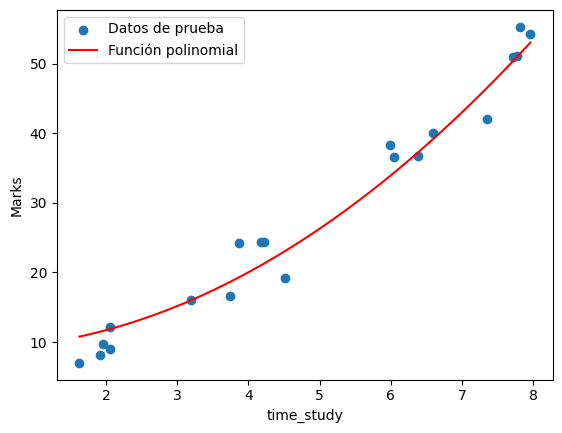

In [13]:
polynomial_training_mse = mean_squared_error(train_features, train_targets, polynomial_hypothesis, polynomial_optimal_theta)
polynomial_testing_mse = mean_squared_error(test_features, test_targets, polynomial_hypothesis, polynomial_optimal_theta)

print("MSE subconjunto de entrenamiento: ", polynomial_training_mse)
print("MSE subconjunto de prueba: ", polynomial_testing_mse)

# Se grafican los datos de prueba
plt.scatter(test_features, test_targets, label='Datos de prueba')

# Genera los valores 'x' para la grafica de la predicción
x_values = np.linspace(test_features.min(), test_features.max(), 100)

y_values = polynomial_hypothesis(x_values, polynomial_optimal_theta)
# Grafica la prediccoón como una linea
plt.plot(x_values, y_values, color='red', label='Función polinomial')

plt.xlabel('time_study')
plt.ylabel('Marks')

plt.legend()

plt.show()

Creo que es evidente que la regresión polinomial fue mucho más efectiva en la predicción de los datos que la regresión lineal. Las metricas también lo respaltan, estamos comparando un *MSE* de 22.823 contra 8.952, lo cual es algo considerable, el error cuadratico medio se redujo casi por un factor de 3, y la misma gráfica muestra como el modelo polinomial se acopla mucho más adecuaadmente a los datos.